### Проект проверки гипотез по увеличению прибыли. 

#### Основные задачи. 

* Приоритизировать гипотезы;
* Запустить A/B-тест;
* Проанализировать результаты;
* Принять решение на основании полученных результатов.

#### Краткое описание. 

Мы работаем в отделе аналитики крупного интернет-магазина. Вместе с отделом маркетинга подготовили список гипотез для увеличения выручки. Принято решение в необходимости проведения A/B - теста. Подготовлены гипотезы, далее необходимо приоритизировать гипотезы, запустить тест и дать рекомендации на основании проведенного анализа. 

#### План работы. 

* Откроем и изучим общую информацию о данных;
* Произведем обработку данных;
* Выявим и исправим ошибки в данных, в случае наличия;
* Отсортируем гипотезы по убыванию приоритету;
* Проведем A/B - тест;
* Проанализируем итоги A/B - теста;
* Примем решения на основании полученных результатов.

#### Названия столбцов. 

1) Данные гипотез: (hypothesis)

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

2) Информация о заказах: (orders)

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

3) Информация о пользователях: (visitors)

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

### Обзор данных. 

In [1]:
# импортируем библиотеки.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats as st

In [2]:
# параметр для просмотра расширенных данных в таблице.
pd.options.display.max_colwidth = 150

In [3]:
# получаем данные для исследования 
path = 'C:\\Users\\tbyni\\Рабочий стол\\Проекты ЯП_ДА\\Яндекс_11ый_проект_ДА\\'
hypothesis = pd.read_csv(path + 'hypothesis.csv', sep = ',')
orders = pd.read_csv(path + 'orders.csv', sep = ',')
visitors = pd.read_csv(path + 'visitors.csv', sep = ',')

In [4]:
# просмотрим общую информацию о данных.
def information (a, b, c):
    display(a.head(9))
    display(b.head(5))
    display(c.head(5))
    display(a.info())
    display(b.info())
    display(c.info())
    display(a.isna().sum())
    display(b.isna().sum())
    display(c.isna().sum())
information(hypothesis, orders, visitors)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

In [5]:
# проверяем данные в orders на наличие дубликатов.
orders.duplicated().sum()

0

In [6]:
# проверяем данные в visitors на наличие дубликатов.
visitors.duplicated().sum()

0

In [7]:
# просматриваем кол-во пользователей которые могли попасть в обе группы при проведении теста. 
len(np.intersect1d(orders.query('group == "A"')['visitorId'], orders.query('group == "B"')['visitorId']))

58

In [8]:
# проверяем распределение пользователей по группам. 
allocation_groups = orders.groupby('group')['visitorId'].sum()
allocation_groups

group
A    1211535685633
B    1381118605657
Name: visitorId, dtype: int64

In [9]:
# просматриваем продолжительность проведения теста в обеих группах.
visitors.groupby('group')['date'].agg(['min', 'max'])

,min,max
group,,
A,2019-08-01,2019-08-31
B,2019-08-01,2019-08-31


#### Вывод.

* Просматривая данные выделим следующее:
* Для исследования получены 3 таблицы (hypothesis (5 столбцов и 9 строк), orders (5 столбцов и 1197 строк), visitors (3 столбца и 62 строки);
* В данных отсутствуют пропущенные значения и дубликаты;
* Неверный формат данных в столбцах date, в таблицах visitors и orders необходимо заменить на datetime;
* Необходимо привести названия столбцов, таблицы hypothesis к нижнему регистру;
* Как мы можем заметить, что 58 пользователей попали в обе группы, такое кол-во менее 5%, значит можем удалить эти данные чтобы не было искажений;
* Проверили распределение по группам, погрешность 1 %;
* Просмотрели сроки проведения теста совпадают;
* Тест парный;
* Кол-во пользователей по группам, следующее: группа "А" - 18736, группа "В" - 18916. 

### Обработка данных.

In [10]:
# приведем названия столбцов к нижнему регистру.
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [11]:
# приведем столбец date к нужному формату.
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d')
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')

In [12]:
# удаляем задвоенные id по группам
delete_id = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())
delete_id = delete_id.tolist()
orders = orders[~orders.visitorId.isin(delete_id)]

### Приоритизация гипотез.

#### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [13]:
# используем способ приоритизации задач ICE и отсортируем по приоритету
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
round(hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False), 1)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


Сформирована тройка лидеров, но без учета кол-ва пользователей которых затронет изменение.

In [14]:
# используем способ приоритизации задач RICE и отсортируем по приоритету
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
round(hypothesis[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False), 1)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Как мы можем заметить относительно способа ICE, в лидерах уже иная гипотеза, причем со значительным отрывом.

In [15]:
# отсортируем именно по RICE 
round(hypothesis[['hypothesis', 'reach','ICE', 'RICE']].sort_values(by = 'RICE', ascending = False), 1)

,hypothesis,reach,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1.0,3.0


#### Вывод

- После использования 2х, наиболее популярных способов по приоритизация гипотез мы получили явную 5ку лидеров
- Как мы можем заметить из общей таблицы лидеры гипотез меняются в зависимости от способа приоритизации - это связано с тем, что когда мы учитываем скольких пользователей затронет изменение меняется и рейтинг гипотез.

### Анализ A/B-теста.

#### Построим график кумулятивной выручки по группам.

In [16]:
# создадим уникальные пары с датой, когда был совершён заказ и группой A/B-теста, в которую попал заказ.
datesGroups = orders[['date', 'group']].drop_duplicates()

Далее собирем агрегированные кумулятивные данные по дням о заказах и пользователях, чтобы после объединить в 1 таблицу.

In [17]:
# найдем сумму выручки по группам с уникальными id и датами.
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [18]:
# получаем кол-во пользователей по группам. 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [19]:
# объединяем данные для формирования необходимого графика.
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
 # cumulativeData.head(5) # check

- Получили таблицу для каждой группы теста со следующими данными:
 * Дата (date)
 * Группа (group)
 * Кумулятивное количество заказов (orders)
 * Кумулятивное количество пользователей (buyers)
 * Кумулятивная выручка (revenue)
 * Кумулятивное количество посетителей (visitors)

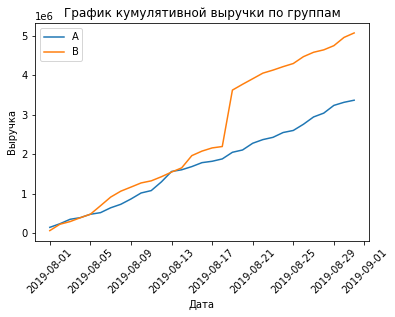

In [20]:
# датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням в группах А и B
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors']]

# строим графики выручки групп А и В
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label= 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label= 'B')
plt.xticks(rotation=45)
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.title('График кумулятивной выручки по группам')

plt.legend()
plt.show()

- В течение всего теста выручка по каждой группе увеличивается;
- График выручки в группе А растет равномерно в течение всего теста;
- График в группе В рос равномерно до 17.08.2019, далее последовал резкий скачок из чего можем сделать предположение, что в данный период был либо резкий скачок по кол-ву заказов, либо появление очень дорогих заказов.
----------
* Далее рассмотрим подробнее в связи с чем может быть связан такой резкий скачок. 

#### График кумулятивного среднего чека по группам.

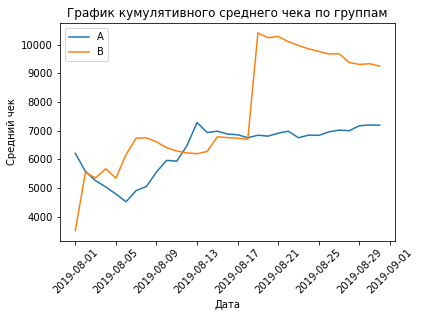

In [21]:
# получаем график кумулятивного среднего чека
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.title('График кумулятивного среднего чека по группам')
plt.legend()
plt.show()

- Как мы можем увидеть из графика колебания все еще велики и пока рано делать выводы из получившихся результатов.
- В группе А резкий скачок наблюдается - 05.08.2019, а в В, как и ранее 17.08.2019.

#### График относительного изменения кумулятивного среднего чека группы B к группе A.

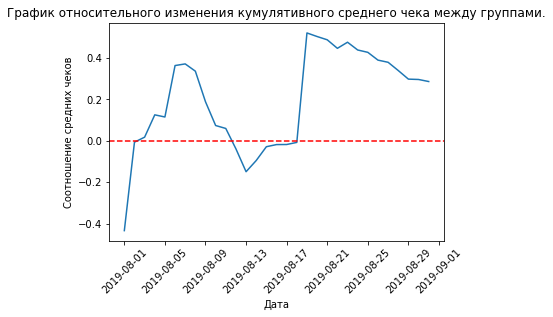

In [22]:
# строим график относительного изменения.
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on = 'date', right_on = 'date', how = 'left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=45)
plt.xlabel("Дата")
plt.ylabel("Соотношение средних чеков")
plt.title('График относительного изменения кумулятивного среднего чека между группами.')
plt.axhline(y=0, color='red', linestyle = '--')
plt.show()

* Как мы видим в графике присутствуют резкие колебания, скорее всего в эти даты и были аномалии;
* Будем искать выбросы.

#### График кумулятивного среднего количества заказов на посетителя по группам.

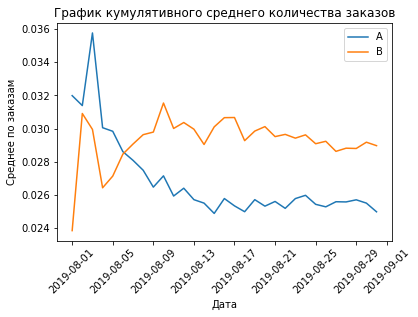

In [23]:
# получаем данные по кол-ву среднего кол-ва заказов.
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders'] / cumulativeRevenueA['visitors'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders'] / cumulativeRevenueB['visitors'], label='B')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Среднее по заказам')
plt.title('График кумулятивного среднего количества заказов')
plt.legend()
plt.show()

Как мы можем заметить на графиках очень сильные различия. При резком скачке в районе 01.08.2019 последовал резкий обвал, однако после 05.08.2019 в группе B был отскок. Тогда в группе А мы наблюдаем стабильное снижение и стабилизацию.

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

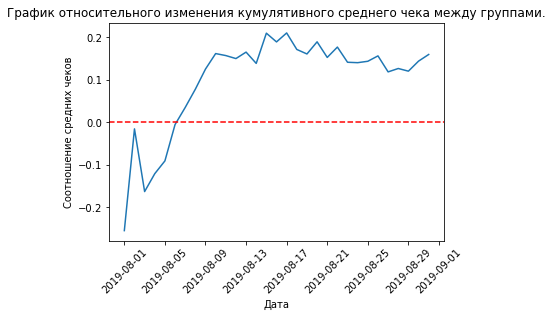

In [24]:
# формируем график относительного изменения.
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on = 'date', right_on = 'date', how = 'left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['visitorsB'])/(mergedCumulativeRevenue['ordersA']/mergedCumulativeRevenue['visitorsA'])-1)
plt.xticks(rotation=45)
plt.xlabel("Дата")
plt.ylabel("Соотношение средних чеков")
plt.title('График относительного изменения кумулятивного среднего чека между группами.')
plt.axhline(y=0, color='red', linestyle = '--')
plt.show()

Можем заметить, что группа "В" показывает себя гораздо увереннее в сравнении с "А", хоть и график резко скачет, что может указывать на выбросы.

#### Точечный график количества заказов по пользователям.

In [25]:
# групируем данные заказов по пользователям.
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'order']

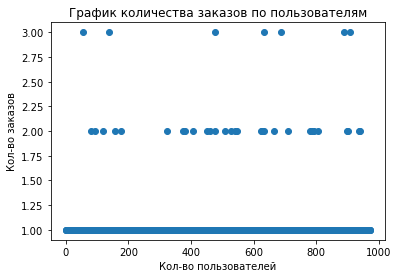

In [26]:
# строим график по кол-ву заказов
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['order'])
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во заказов')
plt.title('График количества заказов по пользователям')
plt.show()

- Из графика видно, что пользователей сделавших 1-2 заказов львиная доля; 
- Есть пользователи совершившие более 5 заказов. 

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [27]:
# сортируем по кол-ву заказов
ordersByUsers.sort_values(by='order', ascending=False).head(10)

,visitorId,order
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


In [28]:
np.percentile(ordersByUsers['order'], [95, 99])

array([1., 2.])

* Определяем, что в 95% случаев кол-во заказов не более 1;
* Определяем, что в 99% случаев кол-во заказов не более 2;
* Рамки определены 95% и 99%.
---- 
Как фильтр аномалий примем, что в 95% случаев кол-во заказов не более 1ого.

#### Построим точечный график стоимостей заказов.

In [29]:
# отсортируем по стоимости заказов
orders.sort_values(by='revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


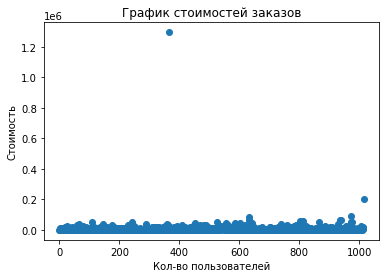

In [30]:
# строим точечный график стоимости заказов
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Кол-во пользователей')
plt.ylabel('Стоимость')
plt.title('График стоимостей заказов')
plt.show()

- Можем заметить, что самые крупные заказы были сделаны в группе "В";
- Отметим 2 наиболее крупных выброса с аномальными заказами.

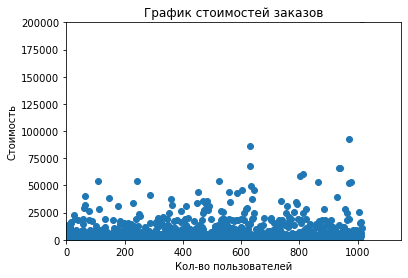

In [31]:
# строим точечный график стоимости заказов
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Кол-во пользователей')
plt.ylabel('Стоимость')
plt.title('График стоимостей заказов')
plt.axis([0, 1150, 0, 200000])
plt.show()

- Убрав крупнейшие траты, отметим, что заказов более 100Т нет;
- Редкий заказ бывает более 25Т.

#### Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [32]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

- Определяем, что в 95% случаев стоимость заказа не превышает стоимости в 26785 руб;
- Определяем, что в 99% случаев стоимость заказа не превышает стоимости в 53904 руб;
- Рамки определены 95% и 99%. 
---
Как фильтр аномалий примем, что в 95% случаев стоимость заказов не превышает 26785 руб. 

#### Посчитайтаем статистическую значимость различий в среднем количестве заказов на посетителя между группами. 

Формулируем гипотезы:

- H0: По "сырым" данным в среднем количестве заказов на посетителя между группами "А" и "В" разница статистически значима.
- H1: По "сырым" данным в среднем количестве заказов на посетителя между группами "А" и "В" разница статистически незначима.
- alpha = 0.05 

In [33]:
# получаем данные, где пользователи совершили хотя бы 1 заказ для группы "А"
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index = False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

In [34]:
# получаем данные, где пользователи совершили хотя бы 1 заказ для группы "В"
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

In [35]:
# получаем данные, где пользователю соответствует кол-во заказов в группе "А". 
sampleA = pd.concat(
    [ordersByUsersA['orders'], pd.Series(0, index=np.arange(visitors['visitors']
                                                            .sum() - len(ordersByUsersA['orders'])), name = 'orders')], axis = 0)

In [36]:
# получаем данные, где пользователю соответсвует кол-во заказов в группе "В". 
sampleB = pd.concat(
    [ordersByUsersB['orders'], pd.Series(0, index=np.arange(visitors['visitors']
                                                            .sum() - len(ordersByUsersB['orders'])), name = 'orders')], axis = 0)

In [37]:
# получаем p-value
print('alpha = 0.05')
print(f'p-value = {"{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1])}')

alpha = 0.05
p-value = 0.00743


In [38]:
# просчитываем относительный прирост
print(f'Относительный прирост группы "В" = {"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)}')

Относительный прирост группы "В" = 0.171


- p-value = 0.00743, что менее установленного критического уровня статистической значимости из чего следует разница статистически значима.
- Относительный прирост группы "В" к группе "А" равен 17.1%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Формулируем гипотезы:

- H0: По "сырым" данным в среднем чеке заказов на между группами "А" и "В" разница статистически значима.
- H1: По "сырым" данным в среднем чеке заказов на между группами "А" и "В" разница статистически незначима.
- alpha = 0.05

In [39]:
# получаем p-value
print('alpha = 0.05')
print(f'p-value = {"{0:.3f}".format(st.mannwhitneyu(orders[orders["group"]=="A"]["revenue"], orders[orders["group"]=="B"]["revenue"])[1])}')

alpha = 0.05
p-value = 0.829


In [40]:
# просчитываем относительный прирост
print(f'Относительный прирост группы "В" = {"{0:.3f}".format(orders[orders["group"]=="B"]["revenue"].mean()/orders[orders["group"]=="A"]["revenue"].mean()-1)}')

Относительный прирост группы "В" = 0.287


- p-value = 0.829, что более установленного критического уровня статистической значимости, значит мы можем отвергнуть гипотезу - Н0 и предположить, что разница статистически незначима.
- Относительный прирост группы "В" к группе "А" равен 28.7%, но с пометкой на то, что именно в группе "В" самые крупные заказы. 

#### Получим данные для "очистки".

In [41]:
# фильтруем по пользователям.                  
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['order'], 95)]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['order'], 95)]['visitorId'],
    ],
    axis=0,
)

In [42]:
# фильтруем по стоимости.
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0)
    .drop_duplicates()
    .sort_values()
)

In [43]:
abnormalUsers.head(5)

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64

In [44]:
# просматриваем кол-во  аномальных пользователей. 
print(f'Кол-во аномальных пользователей = {abnormalUsers.nunique()}')
print(f'Процент аномальных пользователей от общего кол-ва = {round((abnormalUsers.nunique()/orders["visitorId"].nunique())*100, 2)} %')

Кол-во аномальных пользователей = 86
Процент аномальных пользователей от общего кол-ва = 8.84 %


#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Формулируем гипотезы:

- H0: По "очищенным" данным в среднем количестве заказов на посетителя между группами "А" и "В" разница статистически значима.
- H1: По "очищенным" данным в среднем количестве заказов на посетителя между группами "А" и "В" разница статистически незначима.
- Критический уровень статистической значимости установим .05

In [45]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [46]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [47]:
print('p-value: {0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

p-value: 0.01120


In [48]:
print('Относительное изменение: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Относительное изменение: 0.185


- p-value = 0.01120, что менее установленного критического уровня статистической значимости из чего следует разница статистически значима, как и в случае с "сырыми" данными.
- Относительный прирост группы "В" к группе "А" равен 18.5%

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Формулируем гипотезы:

- H0: По "очищенным" данным в среднем чеке заказов на между группами "А" и "В" разница статистически значима.
- H1: По "очищенным" данным в среднем чеке заказов на между группами "А" и "В" разница статистически незначима.
- Критический уровень статистической значимости установим .05.

In [49]:
print('p-value: {0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    ))

p-value: 0.727


In [50]:
print("Относительное изменение{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    ))

Относительное изменение-0.034


- p-value = 0.727, как и в случае с "сырыми" отметим, что статистической значимости нет. 
- После очистки данных прироста нет и прирост показывает отрицательную динамику.

### Вывод.

- Тест прошел в корректных временных рамках;
- Выборка по группам корректна; 
- Группа "В" лидирует по среднему кол-ву заказов, что отчетливо видно по графику, который к концу теста выровнялся;
- Отметим, что после очистки от 2х крупнейших заказов в группе "В" мы заметили, что график среднего чека по группам начался снижаться для группы "В";
- Просматривая график относительного среднего чека, отметим, что благодаря выбросам он так и не стабилизировался.

------

Исходя из полученных данных можем остановить тест и зафиксировать победу группы "В", т.к несмотря на то, что нам не удалось получить большое увеличение прибыли, мы смогли увеличить кол-во заказов, что потенциально ведет к увеличению и прибыли. Далее мы можем проверить те самые заказы установить кол-во и стоимость данных заказов чтобы проработать увеличение прибыли. 